In [9]:
import starry
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [226]:
star_bright_ld = starry.LimbDarkenedMap(10)
star_control_ld = starry.LimbDarkenedMap(10)

star_bright_ld[1] =  0.17151765
star_bright_ld[2] = 0.24481933

star_control_ld[1] =  0.17151765
star_control_ld[2] = 0.24481933

star_bright = starry.Map(10)
star_bright[:] = star_bright_ld.y
star_control = starry.Map(10)
star_control[:] = star_control_ld.y

for i in range(0, 360, 30):
    star_bright.add_gaussian(sigma=0.01, amp=1e4, lat=0, lon=i)

In [227]:
# https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics
star_bright[0, 0] = 1/(0.5*np.sqrt(1/np.pi))
star_control[0, 0] = 1/(0.5*np.sqrt(1/np.pi))

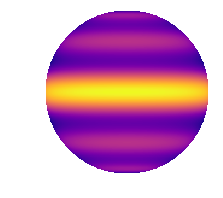

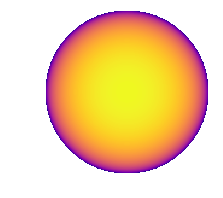

In [228]:
star_bright.show()
star_control.show()

In [229]:
star_bright.evaluate(x=0, y=0) / star_control.evaluate(x=0, y=0)

array([ 1.33443426])

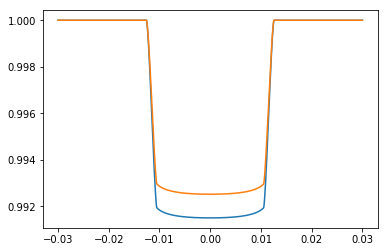

In [230]:
import astropy.units as u

times = np.linspace(-0.03, 0.03, 1000)
r = (0.7266/100)**0.5
b = 0.157
period = 1.51087637 * u.day
ars = 20.56
R_star = 0.1210 * R_sun
a = ars * R_star

from astropy.constants import R_sun
v = 2*np.pi*a/period
t = np.linspace(-0.03, 0.03, 1000)
x = (v * t*u.day / R_star).decompose().value

flux_spot = star_bright.flux(ro=r, xo=x, yo=b)
flux_spot /= flux_spot[0]

flux_nospot = star_control.flux(ro=r, xo=x, yo=b)
flux_nospot /= flux_nospot[0]

# plt.plot(flux_spot - flux_nospot)
plt.plot(t, flux_spot)
plt.plot(t, flux_nospot)
# plt.plot()

In [231]:
phase, flux = np.loadtxt('phased/b_phased.txt', unpack=True)

flux = flux[np.argsort(phase)]
phase = phase[np.argsort(phase)]
time = phase * period.value

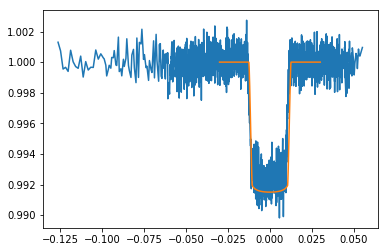

In [232]:
plt.plot(time, flux)
plt.plot(t, flux_spot)